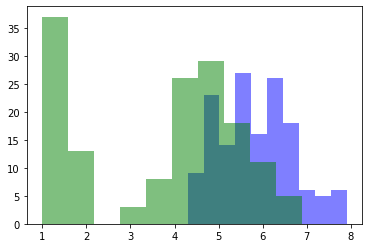

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#######################################
# 演習１

# iris data 読み込み
data_dir = './data/'
iris=pd.read_csv(data_dir + 'iris_2metrics2.csv')

##########
# 演習1-1
# 可視化 : histgram
plt.hist(iris['sepal-length'], color='blue', alpha=0.5)
plt.hist(iris['petal-length'], color='green', alpha=0.5)
plt.show()


5.843333333333335
0.8253012917851409
3.7586666666666693
1.7585291834055201


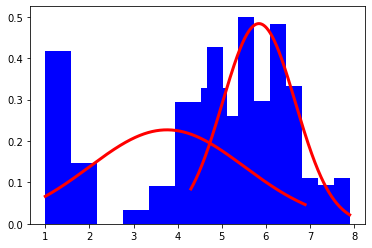

In [4]:
##########
# 演習1-2
# sepal-length：histogramへガウス分布を当てはめる
from scipy.stats import norm
mu = np.mean(iris['sepal-length'])  # 平均
sigma = np.std(iris['sepal-length'])  # 標準偏差
print(mu)
print(sigma)

a = np.min(iris['sepal-length'])  # 最小値 (プロットの範囲指定に利用)
b = np.max(iris['sepal-length'])  # 最大値 (プロットの範囲指定に利用)
plt.hist(iris['sepal-length'], color='blue', range=(a,b), density=True)
x = np.arange(a,b,0.01)  # aからbまで0.01刻みの数字が入った一次元ndarray
# 平均mu，標準偏差sigmaの正規分布をプロット
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),lw=3,color="r")  # lwは線分の太さ

# petal-length：histogramへガウス分布を当てはめる
from scipy.stats import norm
mu = np.mean(iris['petal-length'])
sigma = np.std(iris['petal-length'])
print(mu)
print(sigma)

a = np.min(iris['petal-length'])
b = np.max(iris['petal-length'])
plt.hist(iris['petal-length'], color='blue', range=(a,b), density=True)
x = np.arange(a,b,0.01)
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),lw=3,color="r")


1.464
0.17176728442867115
4.26
0.4651881339845204
5.552
0.5463478745268441


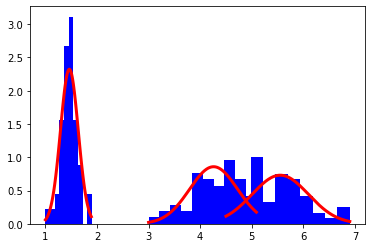

In [6]:
##########
# 演習1-3
# classごとにデータを分類
irisSetosa = iris[iris.iloc[:,2]=='Iris-setosa']  # クラスが'Iris-setosa'のデータのみ抽出
irisVersicolor = iris[iris.iloc[:,2]=='Iris-versicolor']  # クラスが'Iris-versicolor'のデータのみ抽出
irisVirginica = iris[iris.iloc[:,2]=='Iris-virginica']  # クラスが'Iris-virginica'のデータのみ抽出

# irisSetosa:petal-length：histogram へガウス分布を当てはめる
from scipy.stats import norm
mu = np.mean(irisSetosa['petal-length'])  # 平均
sigma = np.std(irisSetosa['petal-length'])  # 標準偏差
print(mu)
print(sigma)

a = np.min(irisSetosa['petal-length'])  # 最小値 (プロットの範囲指定に利用)
b = np.max(irisSetosa['petal-length'])  # 最大値 (プロットの範囲指定に利用)
plt.hist(irisSetosa['petal-length'], color='blue', range=(a,b), density=True)
x = np.arange(a,b,0.01)
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),lw=3,color="r")


# irisVersicolor:petal-length：histogram へガウス分布を当てはめる
from scipy.stats import norm
mu = np.mean(irisVersicolor['petal-length'])
sigma = np.std(irisVersicolor['petal-length'])
print(mu)
print(sigma)

a = np.min(irisVersicolor['petal-length'])
b = np.max(irisVersicolor['petal-length'])
plt.hist(irisVersicolor['petal-length'], color='blue', range=(a,b), density=True)
x = np.arange(a,b,0.01)
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),lw=3,color="r")


# irisVirginica:petal-length：histogram へガウス分布を当てはめる
from scipy.stats import norm
mu = np.mean(irisVirginica['petal-length'])
sigma = np.std(irisVirginica['petal-length'])
print(mu)
print(sigma)

a = np.min(irisVirginica['petal-length'])
b = np.max(irisVirginica['petal-length'])
plt.hist(irisVirginica['petal-length'], color='blue', range=(a,b), density=True)
x = np.arange(a,b,0.01)
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),lw=3,color="r")

In [7]:
##########
# 演習1-4
# 母平均の信頼区間の推定
from scipy import stats
# 平均と標準偏差を求める
mu = np.mean(iris['sepal-length'])
sigma = np.std(iris['sepal-length'])
print(mu)
print(sigma)
# 母平均の95%信頼区間の推定
alpha = 0.95 # 信頼係数95%
n = len(iris['sepal-length']) # sample数
t = stats.t.ppf(1-(1-alpha)/2, n-1) # t分布を用いて確率変数tを計算
t_min = mu - t * sigma / np.sqrt(n-1) # 下限
t_max = mu + t * sigma / np.sqrt(n-1) # 上限
print(u"信頼区間の下限:",t_min)
print(u"信頼区間の上限:",t_max)

5.843333333333335
0.8253012917851409
信頼区間の下限: 5.709732481507367
信頼区間の上限: 5.976934185159302


In [8]:
##########
# 演習1-5
# sepal-lengthとpetal-lengthの差を
# 棄却域5%で検定せよ

# 対応なしt検定
from scipy import stats
t, p = stats.ttest_ind(iris['sepal-length'], 
                       iris['petal-length'], 
                       equal_var=False)
print(t)
print(p)

13.099504494510061
4.2089735585320426e-29


In [9]:
##########
# 演習1-6
# クラスを分けて、それぞれsepal-lengthとpetal-lengthの差を
# 棄却域5%で検定せよ

# classごとにデータを分類
irisSetosa = iris[iris.iloc[:,2]=='Iris-setosa']
irisVersicolor = iris[iris.iloc[:,2]=='Iris-versicolor']
irisVirginica = iris[iris.iloc[:,2]=='Iris-virginica']

# irisSetosa: 対応なしt検定
from scipy import stats
t, p = stats.ttest_ind(irisSetosa['sepal-length'], 
                       irisSetosa['petal-length'], 
                       equal_var=False)
print('Setosa')
print(t)
print(p)

# irisVersicolor: 対応なしt検定
from scipy import stats
t, p = stats.ttest_ind(irisVersicolor['sepal-length'], 
                       irisVersicolor['petal-length'], 
                       equal_var=False)
print('Versicolor')
print(t)
print(p)

# irisVirginica: 対応なしt検定
from scipy import stats
t, p = stats.ttest_ind(irisVirginica['sepal-length'], 
                       irisVirginica['petal-length'], 
                       equal_var=False)
print('Verginica')
print(t)
print(p)


Setosa
63.748954178432655
1.0602075125648114e-64
Versicolor
16.977883427176682
7.913471797861265e-31
Verginica
8.700473580399905
9.104527547225446e-14


In [10]:
##########
# 演習1-7
# sepal-length, sepal-width, petal-length, petal-widthの
# 平均に差があるか検定せよ

# iris data 読み込み
iris=pd.read_csv(data_dir + 'iris.csv')

# 4群の検定（分散分析）
f, p = stats.f_oneway(iris.iloc[:,0], iris.iloc[:,1],
                      iris.iloc[:,2], iris.iloc[:,3])
print(f)
print(p)

# 多重比較
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

def TukeyKramer(*args): #可変長引数で比較するリストを受け取る
    idx = 0
    data_arr = np.array([]) #全てのデータを一次元配列で列記する
    idx_arr = np.array([]) #データに対応するインデックスを一次元配列で列記する
    for lst in args:
        for nums in lst:
            if isinstance(nums, str) == False: #文字列(欠損値など)はskip
                data_arr = np.append(data_arr, nums)
                idx_arr = np.append(idx_arr, idx)
        idx += 1
    print(pairwise_tukeyhsd(data_arr, idx_arr)) #第3引数のdefaultはp=0.05
    
TukeyKramer(iris['sepal length'], 
            iris['sepal width'],
            iris['petal length'],
            iris['petal width'])    

483.57128302425997
3.4996987081933735e-159
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.0    1.0  -2.7893 0.001 -3.1073 -2.4714   True
   0.0    2.0  -2.0847 0.001 -2.4026 -1.7667   True
   0.0    3.0  -4.6447 0.001 -4.9626 -4.3267   True
   1.0    2.0   0.7047 0.001  0.3867  1.0226   True
   1.0    3.0  -1.8553 0.001 -2.1733 -1.5374   True
   2.0    3.0    -2.56 0.001  -2.878  -2.242   True
---------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
##############################################
# 演習2
# (1)成績データ

# 2群の検定（分散分析）
grade1=pd.read_csv(data_dir + 'grade_data1.csv')
t, p = stats.ttest_rel(grade1['English'], grade1['Mathematics'])
print(f)
print(p)
# 3群の検定（分散分析）
grade2=pd.read_csv(data_dir + 'grade_data2.csv')
f, p = stats.f_oneway(grade2['English'], grade2['Mathematics'],grade2['Chemistry'])
print(f)
print(p)
# 4群の検定（分散分析）
grade3=pd.read_csv(data_dir + 'grade_data3.csv')
f, p = stats.f_oneway(grade3['English'], grade3['Mathematics'],grade3['Chemistry'],grade3['Physics'])
print(f)
print(p)

# 多重比較
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

def TukeyKramer(*args): #可変長引数で比較するリストを受け取る
    idx = 0
    data_arr = np.array([]) #全てのデータを一次元配列で列記する
    idx_arr = np.array([]) #データに対応するインデックスを一次元配列で列記する
    for lst in args:
        for nums in lst:
            if isinstance(nums, str) == False: #文字列(欠損値など)はskip
                data_arr = np.append(data_arr, nums)
                idx_arr = np.append(idx_arr, idx)
        idx += 1
    print(pairwise_tukeyhsd(data_arr, idx_arr)) #第3引数のdefaultはp=0.05
    
TukeyKramer(grade3['English'], grade3['Mathematics'],grade3['Chemistry'],grade3['Physics'])     

483.57128302425997
0.5073669954458611
0.264815316406974
0.769317525099815
7.10274367549773
0.0007208905774034447
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.0    1.0      3.2    0.9 -16.4054 22.8054  False
   0.0    2.0      5.2 0.8854 -14.4054 24.8054  False
   0.0    3.0    -24.3 0.0102 -43.9054 -4.6946   True
   1.0    2.0      2.0    0.9 -17.6054 21.6054  False
   1.0    3.0    -27.5 0.0031 -47.1054 -7.8946   True
   2.0    3.0    -29.5 0.0014 -49.1054 -9.8946   True
-----------------------------------------------------
